In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import cv2

import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [3]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("../input/flowers-recognition/flowers/daisy"):
    try:
        path = "../input/flowers-recognition/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/dandelion"):
    try:
        path = "../input/flowers-recognition/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/rose"):
    try:
        path = "../input/flowers-recognition/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/sunflower"):
    try:
        path = "../input/flowers-recognition/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/tulip"):
    try:
        path = "../input/flowers-recognition/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [5]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

In [6]:
x_train.shape

(3122, 128, 128, 3)

In [7]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(5,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [9]:
epoch = 75
batch_size = 64

In [10]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=60,
    zoom_range = 0.1, 
    width_shift_range=0.1,
    shear_range=0.1,
    ) 
datagen.fit(x_train)

In [11]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/75
48/48 [==============================] - 29s 462ms/step - loss: 1.9671 - accuracy: 0.3963 - val_loss: 8.2258 - val_accuracy: 0.3315
Epoch 2/75
48/48 [==============================] - 19s 383ms/step - loss: 1.2970 - accuracy: 0.4984 - val_loss: 2.6438 - val_accuracy: 0.4819
Epoch 3/75
48/48 [==============================] - 19s 384ms/step - loss: 1.1495 - accuracy: 0.5726 - val_loss: 1.5741 - val_accuracy: 0.5670
Epoch 4/75
48/48 [==============================] - 19s 385ms/step - loss: 1.0385 - accuracy: 0.6093 - val_loss: 1.2941 - val_accuracy: 0.5598
Epoch 5/75
48/48 [==============================] - 18s 381ms/step - loss: 0.9149 - accuracy: 0.6610 - val_loss: 1.1273 - val_accuracy: 0.6413
Epoch 6/75
48/48 [==============================] - 19s 386ms/step - loss: 0.9272 - accuracy: 0.6475 - val_loss: 1.3636 - val_accuracy: 0.5924
Epoch 7/75
48/48 [==============================] - 18s 380ms/step - loss: 0.8979 - accuracy: 0.6666 - val_loss: 0.8561 - val_accuracy: 0.6504

In [12]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))

21/21 [==============================] - 3s 160ms/step - loss: 1.0804 - accuracy: 0.7781
Test Accuracy: 77.81%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


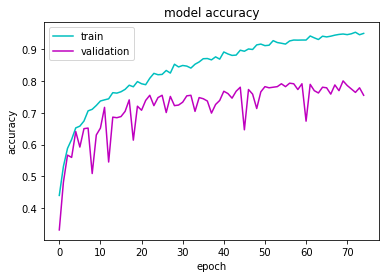

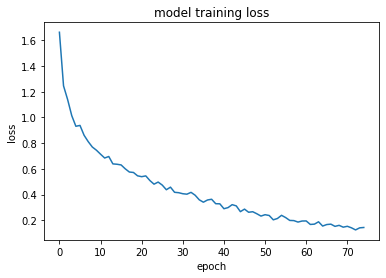

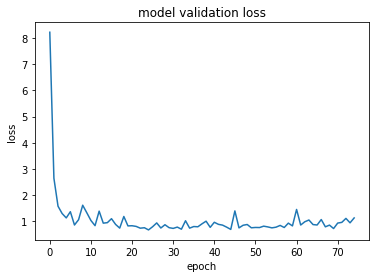

In [13]:
print(history.history.keys())
plt.plot(history.history['accuracy'],color='c')
plt.plot(history.history['val_accuracy'],color='m')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


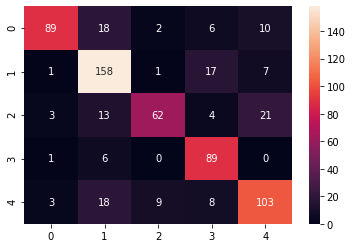

In [14]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)

print(sns.heatmap(confusion_matrix(Y_true,Y_pred_classes),annot=True,fmt= "d"))